In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
from ucimlrepo import fetch_ucirepo 
maintenance_dataset = fetch_ucirepo(id=601) 


In [2]:
  
X = maintenance_dataset.data.features 
y = maintenance_dataset.data.targets 
print(y)


      Machine failure  TWF  HDF  PWF  OSF  RNF
0                   0    0    0    0    0    0
1                   0    0    0    0    0    0
2                   0    0    0    0    0    0
3                   0    0    0    0    0    0
4                   0    0    0    0    0    0
...               ...  ...  ...  ...  ...  ...
9995                0    0    0    0    0    0
9996                0    0    0    0    0    0
9997                0    0    0    0    0    0
9998                0    0    0    0    0    0
9999                0    0    0    0    0    0

[10000 rows x 6 columns]


In [3]:
categorical = X.select_dtypes(include=["object"]).columns

ord_enc = OrdinalEncoder()
X[categorical] = ord_enc.fit_transform(X[categorical])

print(X)
print(X.shape)

      Type  Air temperature  Process temperature  Rotational speed  Torque  \
0      2.0            298.1                308.6              1551    42.8   
1      1.0            298.2                308.7              1408    46.3   
2      1.0            298.1                308.5              1498    49.4   
3      1.0            298.2                308.6              1433    39.5   
4      1.0            298.2                308.7              1408    40.0   
...    ...              ...                  ...               ...     ...   
9995   2.0            298.8                308.4              1604    29.5   
9996   0.0            298.9                308.4              1632    31.8   
9997   2.0            299.0                308.6              1645    33.4   
9998   0.0            299.0                308.7              1408    48.5   
9999   2.0            299.0                308.7              1500    40.2   

      Tool wear  
0             0  
1             3  
2        

C:\Users\lnemt\AppData\Local\Temp\ipykernel_29748\3460261653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical] = ord_enc.fit_transform(X[categorical])


In [4]:
y_targets = len(y.columns.values)
print(y)

      Machine failure  TWF  HDF  PWF  OSF  RNF
0                   0    0    0    0    0    0
1                   0    0    0    0    0    0
2                   0    0    0    0    0    0
3                   0    0    0    0    0    0
4                   0    0    0    0    0    0
...               ...  ...  ...  ...  ...  ...
9995                0    0    0    0    0    0
9996                0    0    0    0    0    0
9997                0    0    0    0    0    0
9998                0    0    0    0    0    0
9999                0    0    0    0    0    0

[10000 rows x 6 columns]


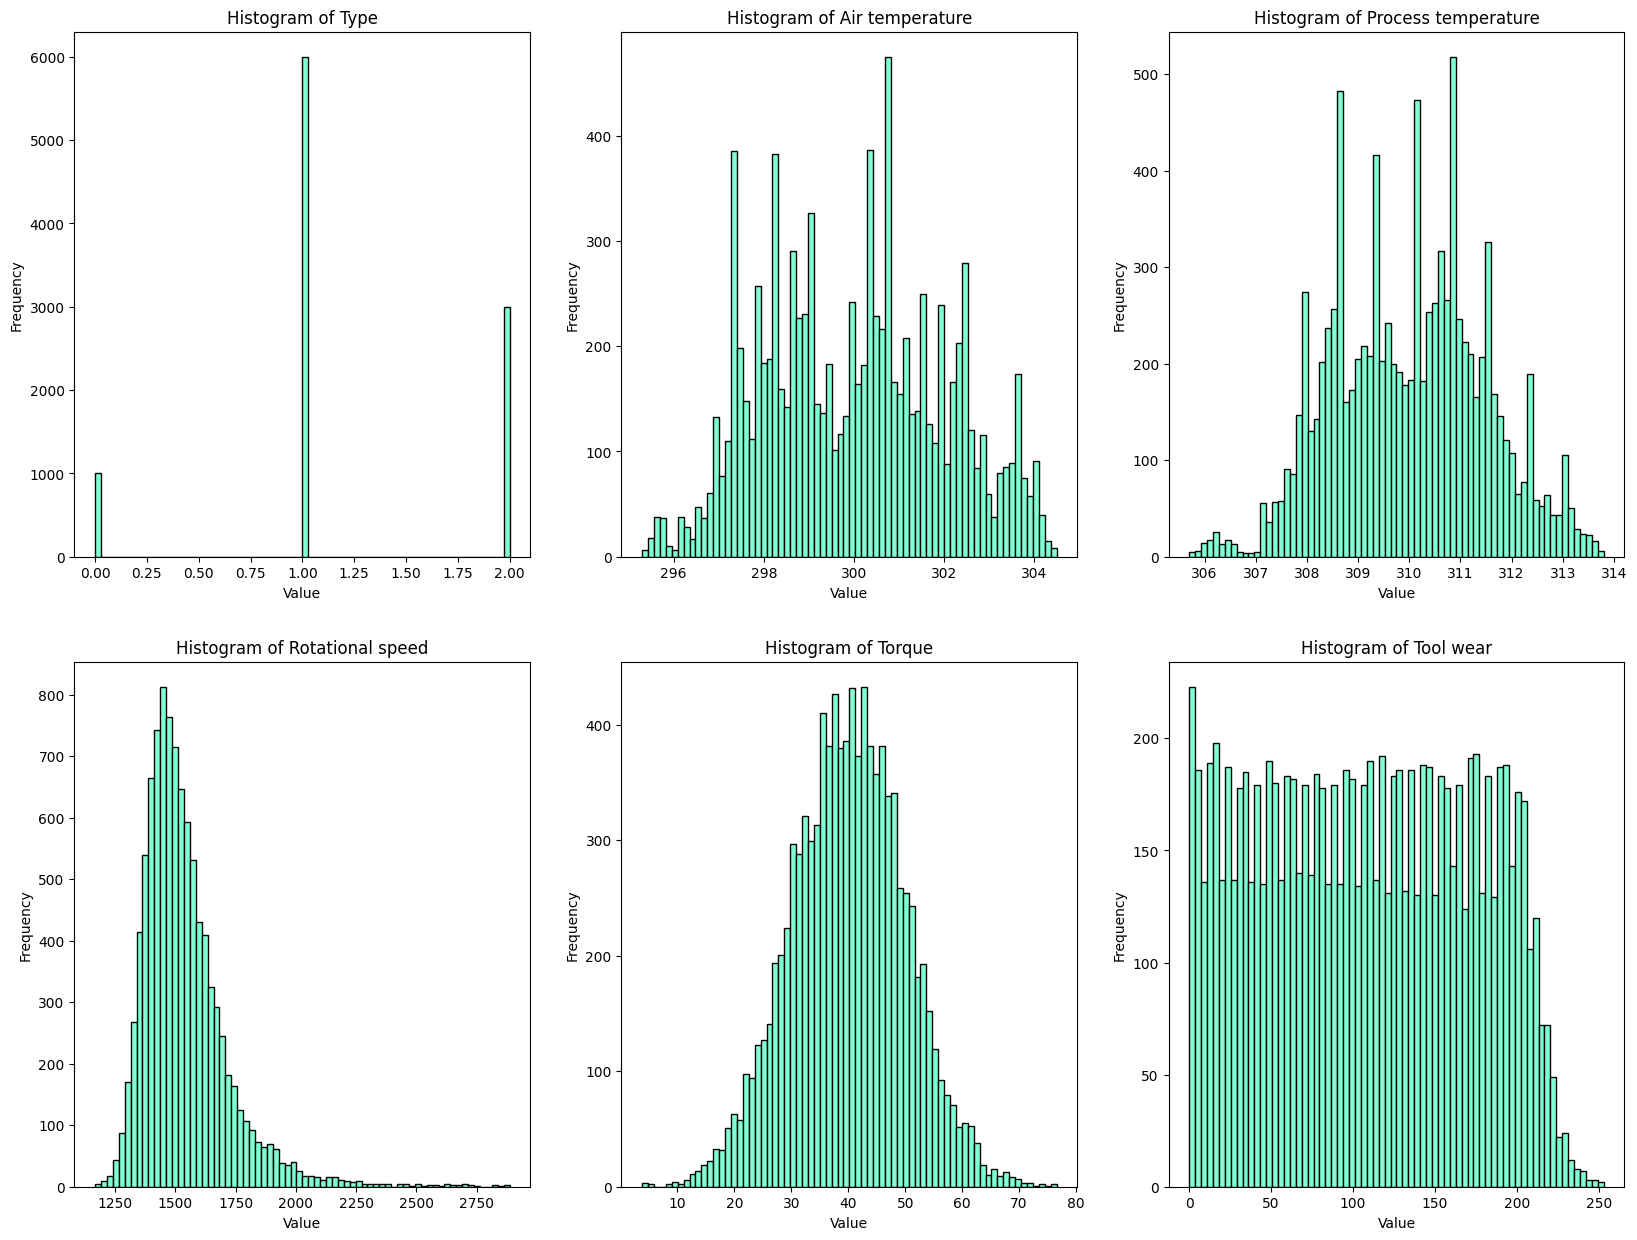

[[1.         0.30434783 0.35802469 0.22293364 0.53571429 0.        ]
 [0.5        0.31521739 0.37037037 0.13969732 0.58379121 0.01185771]
 [0.5        0.30434783 0.34567901 0.19208382 0.62637363 0.01976285]
 ...
 [1.         0.40217391 0.35802469 0.27764843 0.40659341 0.08695652]
 [0.         0.40217391 0.37037037 0.13969732 0.61401099 0.09881423]
 [1.         0.40217391 0.37037037 0.19324796 0.5        0.11857708]]
(10000, 6)


In [5]:
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
ax = ax.flatten()

for idx, column_name in enumerate(X.columns.values):
    ax[idx].hist(X[column_name], bins=70, color='aquamarine', edgecolor='black')
    ax[idx].set_xlabel('Value')
    ax[idx].set_ylabel('Frequency')
    ax[idx].set_title(f'Histogram of {column_name}')

plt.show()

print(X_train)
print(X_train.shape)

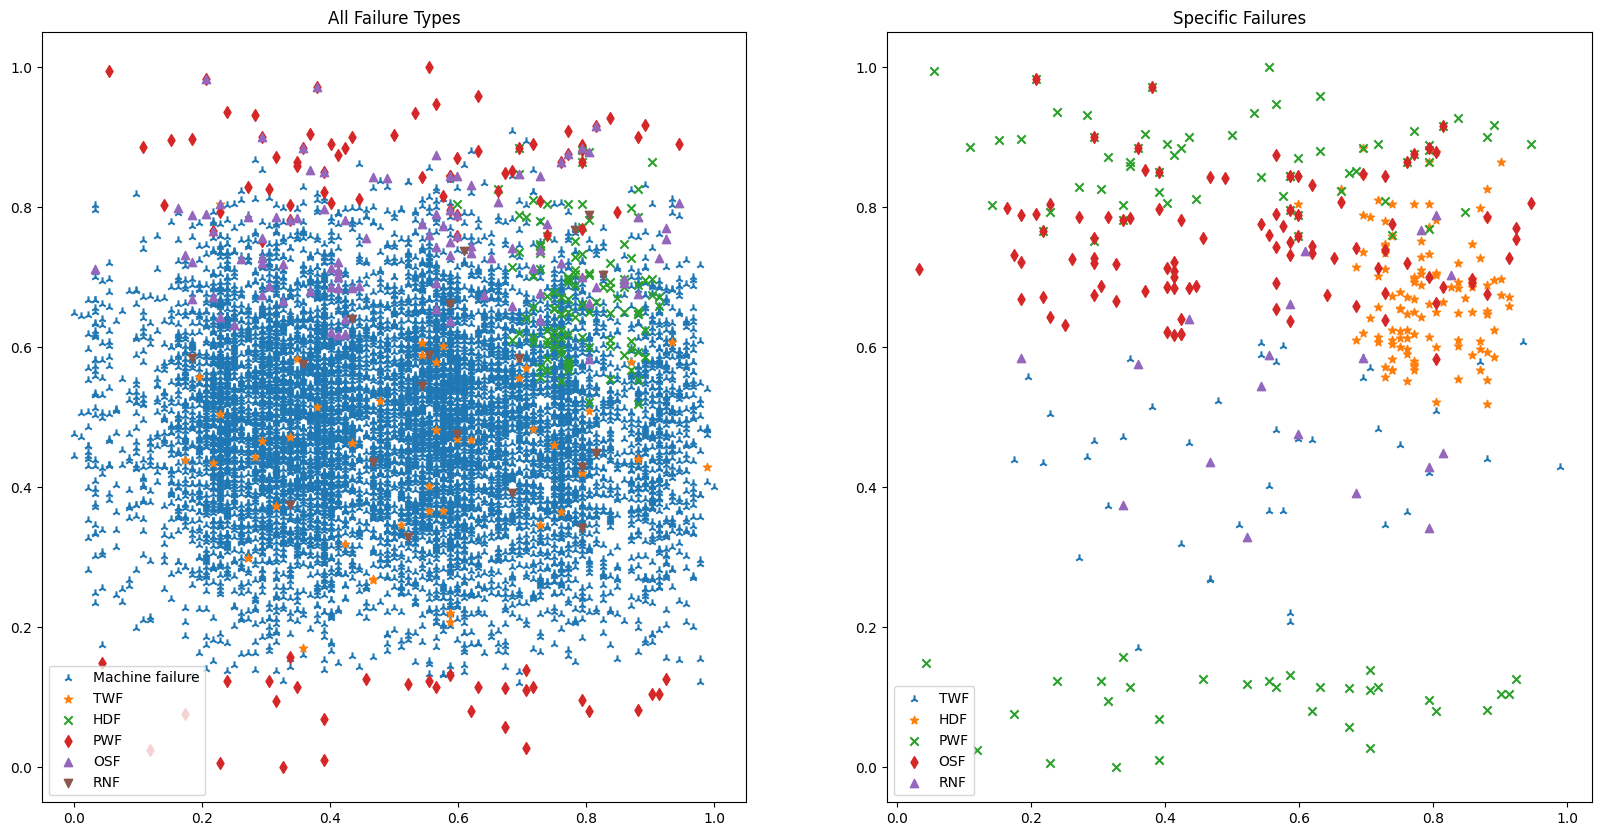

In [6]:
failure_rows = {
    "Machine failure": X_train[y[y["Machine failure"] == 0].index],
    "OSF": X_train[y["OSF"] == 1],
    "TWF": X_train[y[y["TWF"] == 1].index],
    "HDF": X_train[y[y["HDF"] == 1].index],
    "PWF": X_train[y[y["PWF"] == 1].index],
    "RNF": X_train[y[y["RNF"] == 1].index],
}

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

markers = ["2", "*", "x", "d", "^", "v"]
for idx, failure_name in enumerate(y.columns.values):
    ax1.scatter(
        failure_rows[failure_name][:, 1],
        failure_rows[failure_name][:, 4],
        marker=markers[idx],
        label=failure_name,
    )
ax1.set_title("All Failure Types")
ax1.legend()

for idx, failure_name in enumerate(y.columns.values[1:]):
    ax2.scatter(
        failure_rows[failure_name][:, 1],
        failure_rows[failure_name][:, 4],
        marker=markers[idx],
        label=failure_name,
    )
ax2.set_title("Specific Failures")
ax2.legend()

plt.show()


In [7]:
X_train = pd.DataFrame(X_train)
correlation = X_train.corr(
    method="spearman"
)  # spearman потому что у нас в общем случае не нормальное распределиние у фич
print("Correlation matrix:\n", correlation, "\n\n")

indices = np.where(np.logical_or(correlation > 0.5, correlation < -0.5))
indices_to_drop = []
for row, col in zip(indices[0], indices[1]):
    if col > row:
        value = correlation.iloc[row, col]
        indices_to_drop.append(col)
        print(f"Row: {row}, Column: {correlation.columns[col]}, correlation: {value}")
        """  
      The sign of the Spearman correlation indicates the direction of association 
      between X (the independent variable, row) and Y (the dependent variable, col). If Y 
      tends to increase when X increases, the Spearman correlation coefficient is positive. 
      If Y tends to decrease when X increases, the Spearman correlation coefficient is negative.
      """

X_train = X_train.drop(indices_to_drop, axis=1)
print("New X_train:\n", X_train, "\n\n")


Correlation matrix:
           0         1         2         3         4         5
0  1.000000  0.016340  0.013051 -0.004055  0.002484 -0.004027
1  0.016340  1.000000  0.864217  0.013732 -0.011765  0.013495
2  0.013051  0.864217  1.000000  0.016985 -0.014488  0.013702
3 -0.004055  0.013732  0.016985  1.000000 -0.916474  0.003168
4  0.002484 -0.011765 -0.014488 -0.916474  1.000000 -0.003887
5 -0.004027  0.013495  0.013702  0.003168 -0.003887  1.000000 


Row: 1, Column: 2, correlation: 0.8642172381038954
Row: 3, Column: 4, correlation: -0.9164741739092678
New X_train:
         0         1         3         5
0     1.0  0.304348  0.222934  0.000000
1     0.5  0.315217  0.139697  0.011858
2     0.5  0.304348  0.192084  0.019763
3     0.5  0.315217  0.154249  0.027668
4     0.5  0.315217  0.139697  0.035573
...   ...       ...       ...       ...
9995  1.0  0.380435  0.253783  0.055336
9996  0.0  0.391304  0.270081  0.067194
9997  1.0  0.402174  0.277648  0.086957
9998  0.0  0.402174  0.13

In [9]:
print(f"Подлинное число кластеров: {y_targets}\n")
for i in np.arange(4, 8):
    print(f"Количество кластеров: {i}")
    kmeans = KMeans(n_clusters=i)
    y_pred = kmeans.fit_predict(X_train)

    print(f"Инерция: {kmeans.inertia_},")
    """
    Inertia measures how well a dataset was clustered by K-Means.
    It is calculated by measuring the distance between each data point and its centroid,
    squaring this distance, and summing these squares across one cluster.

    A good model is one with low inertia AND a low number of clusters (K). However,
    this is a tradeoff because as K increases, inertia decreases.

    Considered as a bad metric to look at.
    """

    print(f"Силуэт: {silhouette_score(X_train, kmeans.labels_)}\n")
    """
    Computes the mean Silhouette Coefficient of all samples. 
    The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) 
    and the mean nearest-cluster distance (b) for each sample. 
    The Silhouette Coefficient for a sample is (b - a) / max(a, b)
    The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
    Negative values generally indicate that a sample has been assigned to the wrong cluster,
    as a different cluster is more similar.
    """

Подлинное число кластеров: 6

Количество кластеров: 4
Инерция: 956.5440128451271,
Силуэт: 0.28877282618458794

Количество кластеров: 5
Инерция: 860.0697056026464,
Силуэт: 0.2741928423036243

Количество кластеров: 6
Инерция: 670.2688523872386,
Силуэт: 0.32272049850193196

Количество кластеров: 7
Инерция: 717.969299769394,
Силуэт: 0.2838489954632169

